In [1]:
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import seaborn as sns

GROUP_IDS_LIST = [[0, 1, 2, 3], 
                  [4], [5], [6, 7], [8, 9], 
                  [10, 11, 12, 13], 
                  [14], [15], [16, 17], 
                  [18, 19, 20, 21]]
GROUP_NAMES = ['CH$_3$', 'C', 'O', 'NH', 'C$_\\alpha$H', 
               'C$_\\beta$H$_3$', 'C' , 'O', 'NH', 'CH$_3$']

MM_CHARGES = np.array([ 0.1123, -0.3662,  0.1123,  0.1123,  0.5972, -0.5679,
                       -0.4157,  0.2719,  0.0337,  0.0823, -0.1825,  0.0603,
                        0.0603,  0.0603,  0.5973, -0.5679, -0.4157,  0.2719,
                       -0.149 ,  0.0976,  0.0976,  0.0976]) 

In [2]:
raw_data = scipy.io.loadmat(f'data/delta_emle_total.mat', squeeze_me=True)
data = {k: v for k, v in raw_data.items() if hasattr(v, 'shape')}

In [3]:
def charges_to_groups(q, group_ids_list):
    return np.array([np.sum(q[ids], axis=0) for ids in group_ids_list])

q_dft = (data['q_val_dft'] + data['q_core_dft']).reshape((-1, 22)).T
q_emle = (data['q_val_emle'] + data['q_core_emle']).reshape((-1, 22)).T

q_dft_group = charges_to_groups(q_dft, GROUP_IDS_LIST)
q_emle_group = charges_to_groups(q_emle, GROUP_IDS_LIST)
q_mm_group = charges_to_groups(MM_CHARGES, GROUP_IDS_LIST)

In [4]:
def arrays_to_df(array1, array2, label1, label2):
    long_data = []
    for i, (set1, set2) in enumerate(zip(array1, array2)):
        for val in set1:
            long_data.append({'Group': i, 'Condition': label1, 'Charge': val})
        for val in set2:
            long_data.append({'Group': i, 'Condition': label2, 'Charge': val})
    return pd.DataFrame(long_data)

df = arrays_to_df(q_dft_group, q_emle_group, "$\\omega$B97X", 'EMLE')

<Figure size 432x288 with 0 Axes>

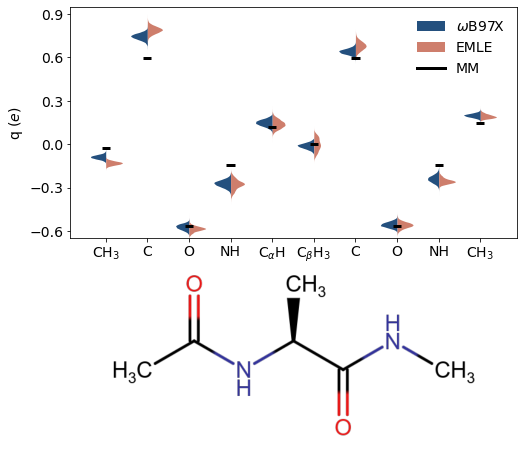

In [5]:
BLUE = "#15508d"
RED = "#de735c"

palette = {"$\\omega$B97X": BLUE, "EMLE": RED}

plt.rc('figure', facecolor='w')
plt.rc('font', size=14)
plt.tight_layout()

fig, axs = plt.subplots(2, 1, figsize=(8, 8), 
                        gridspec_kw={"height_ratios": [1, 0.75]})
fig.subplots_adjust(hspace=0.15)
ax, ax_img = axs
sns.violinplot(ax=ax, x='Group', y='Charge', hue='Condition', data=df, 
               split=True, palette=palette, inner=None, linewidth=0.)
ax.set_ylabel('q ($e$)')
ax.set_ylim([-0.65, 0.95])
ax.set_yticks(np.arange(-0.6, 1, 0.3))
ax.set_xticklabels(GROUP_NAMES)
ax.set_xlabel(None)

for i, q in enumerate(q_mm_group):
    ax.hlines(q, i - 0.1, i + 0.1, colors='black', 
              linestyles='solid', linewidth=3)
ax.plot(0, 0, c='black', linewidth=3, label='MM') 

ax_img.xaxis.set_visible(False)
ax_img.yaxis.set_visible(False)
ax_img.set_frame_on(False)
img = image.imread(f'data/adp_2D.png')
ax_img.imshow(img)

ax.legend(frameon=False)
plt.savefig('Fig3.png', dpi=300, bbox_inches='tight')
plt.show()